<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://www.dropbox.com/s/220ncn0o5danuey/pandas-ipython-tutorials-hedaro.jpg?dl=1" title="Pandas Tutorial | Hedaro" alt="Pandas Tutorial | Hedaro">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Pandas Tutorial -->  
	  <center>
	    <br>
        <h1>Group By and Plot</h1>
        <p>Some nifty ninjastics you can do with Group By and <strong>MatPlotLib</strong></p>
	  </center>	
    <!-- Pandas Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

In [1]:
import pandas as pd
from matplotlib.pylab import plt
import sys

---

Here is the csv data if you want to follow along:
```
Date,Symbol,Volume
1/1/2013,A,0
1/2/2013,A,200
1/3/2013,A,1200
1/4/2013,A,1001
1/5/2013,A,1300
1/6/2013,A,1350
3/8/2013,B,500
3/9/2013,B,1150
3/10/2013,B,1180
3/11/2013,B,2000
1/5/2013,C,56600
1/6/2013,C,45000
1/7/2013,C,200
5/20/2013,E,1300
5/21/2013,E,1700
5/22/2013,E,900
5/23/2013,E,2100
5/24/2013,E,8000
5/25/2013,E,12000
5/26/2013,E,1900
5/27/2013,E,1000
5/28/2013,E,1900

```

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1


In [3]:
# let's see what kind of data we are working with
raw = pd.read_csv('Test_9_17_Python.csv')
raw.head()

,Date,Symbol,Volume
0,1/1/2013,A,0
1,1/2/2013,A,200
2,1/3/2013,A,1200
3,1/4/2013,A,1001
4,1/5/2013,A,1300


In [4]:
df2 = raw.copy()

You are going to have to change the data type of the ***Date*** column

In [5]:
df2.dtypes

Date      object
Symbol    object
Volume     int64
dtype: object

In [6]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [7]:
df2.dtypes

Date      datetime64[ns]
Symbol            object
Volume             int64
dtype: object

In [8]:
# generate some fake data
pool = ['boy','girl']
pool = pool*(int(len(df2)/2))
df2['Gender'] = pool
df = df2.copy()
df.head()

,Date,Symbol,Volume,Gender
0,2013-01-01,A,0,boy
1,2013-01-02,A,200,girl
2,2013-01-03,A,1200,boy
3,2013-01-04,A,1001,girl
4,2013-01-05,A,1300,boy


# Group one column and plot

In [9]:
group = df.groupby('Symbol')

In [10]:
for x in group:
    print(type(x))
    print('//////')

<class 'tuple'>
//////
<class 'tuple'>
//////
<class 'tuple'>
//////
<class 'tuple'>
//////


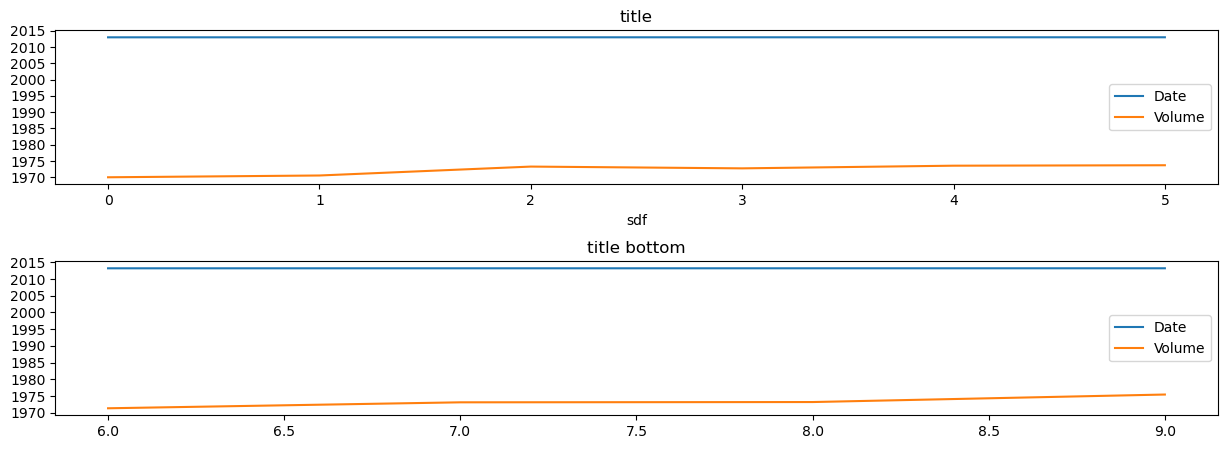

In [11]:
fig, axes = plt.subplots(2,1, figsize=(15,5))
plt.subplots_adjust(hspace=0.5)

group.get_group('A').plot(ax=axes[0])
group.get_group('B').plot(ax=axes[1])

axes[0].set_title('title')
axes[0].set_xlabel('sdf')

axes[1].set_title('title bottom');

C:\Users\17862\AppData\Local\Temp\ipykernel_21792\1431944837.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  a = group.apply(plot, include_groups=True)


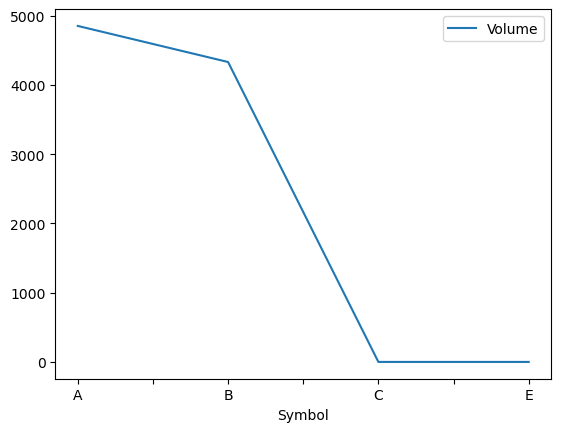

In [12]:
def plot(group):
    mask = group['Volume'].apply(lambda x: x>1000)
    mask2 = group['Symbol'] == 'A'
    mask3 = group['Symbol'] == 'B'
    
    return group['Volume'][mask & (mask2 | mask3)].sum()

a = group.apply(plot, include_groups=True)
a = pd.DataFrame(a)
a = a.rename(columns={0:'Volume'})
a.plot();

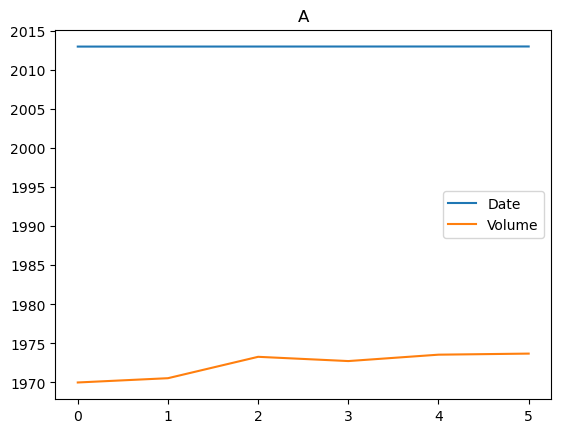

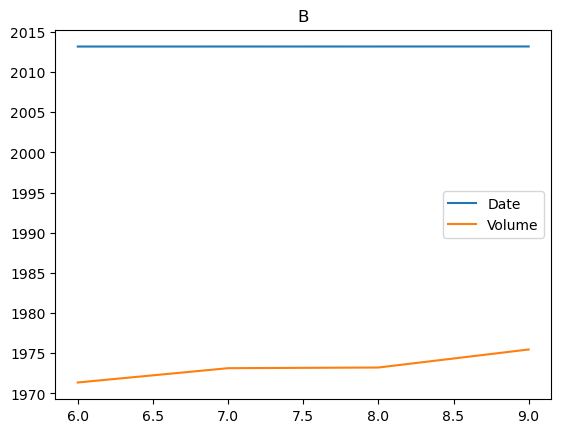

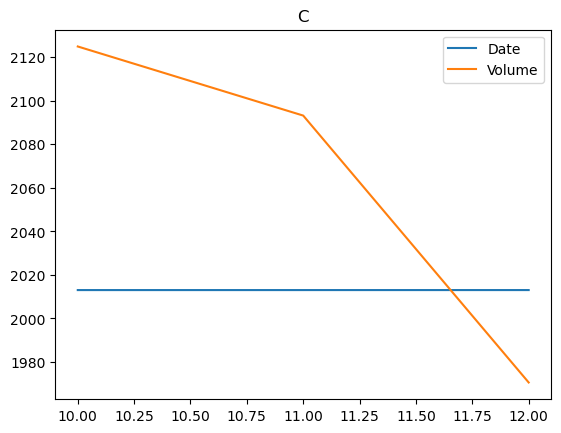

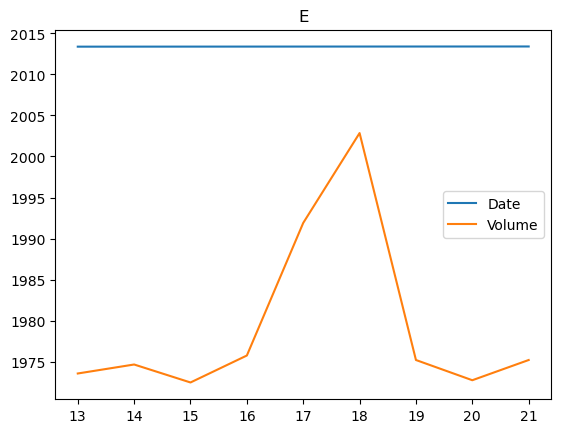

In [13]:
for i, g in group:
    g.plot(title=i)

# Group two columns and plot

In [14]:
group = df.groupby(['Symbol', 'Gender'])

In [15]:
for i, g in group:
    print(i)

('A', 'boy')
('A', 'girl')
('B', 'boy')
('B', 'girl')
('C', 'boy')
('C', 'girl')
('E', 'boy')
('E', 'girl')


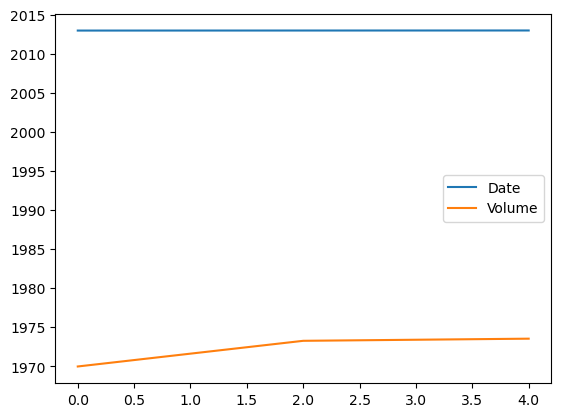

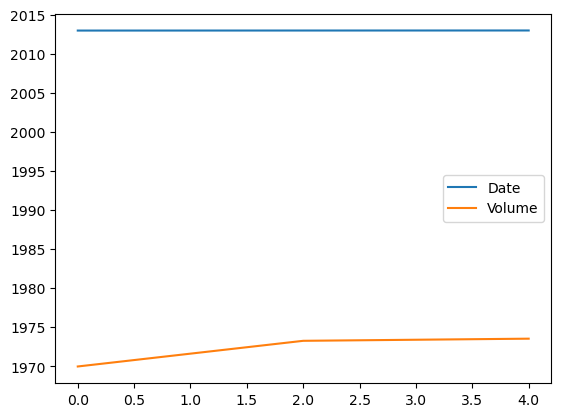

In [16]:
group.get_group(('A', 'boy')).plot()
group.get_group(('A', 'boy')).plot();

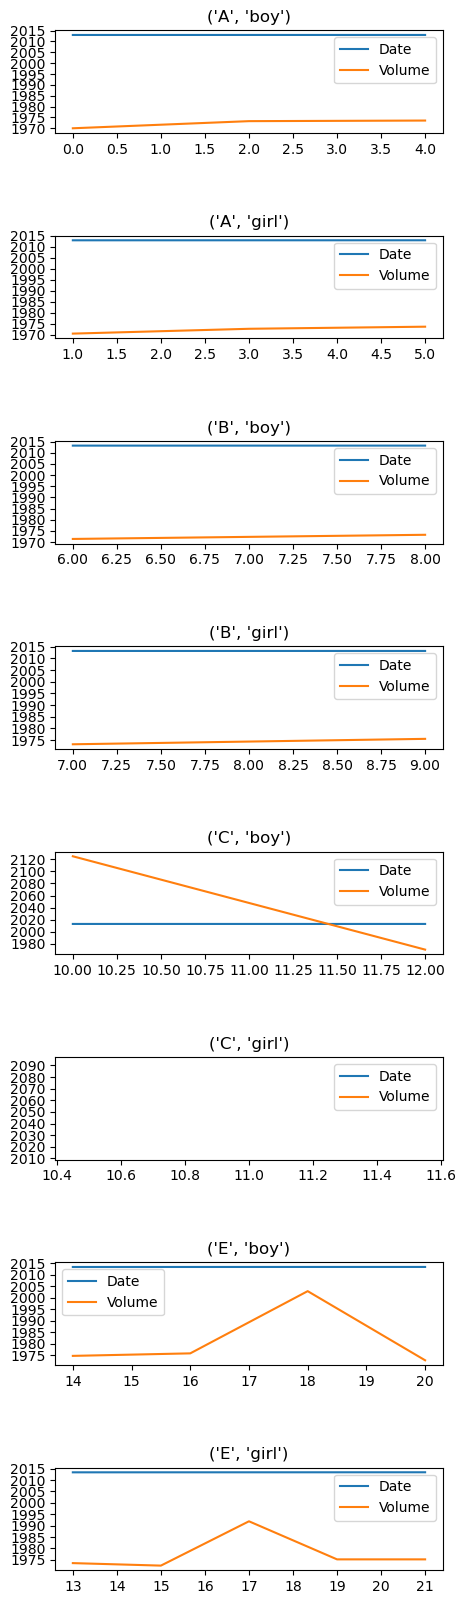

In [17]:
fig, axes = plt.subplots(len(group.groups),1, figsize=(5,20))
fig.subplots_adjust(hspace=1.0) ## Create space between plots
ix = 0

for i, g in group:
    p = g.plot(ax=axes[ix], title=str(i))
    if ix < len(axes)-1:
        ix = ix + 1
    else: 
        ix = 0

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>